# Data Science and Business Analytics (GRIP MAY'21)

# The Sparks Foundation

# Task 1 : Prediction using Supervised ML

# Name : Sai Teja Bandela

 ***STATEMENT :***

 ***FROM THE GIVEN DATASET, PREDICT THE PERCENTAGE OF A STUDENT BASED ON THE NUMBER OF OURS STUDIED***

**IMPORTING LIBRARIES**

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**READING THE DATASET**

In [154]:
dataset="http://bit.ly/w-data"
data=pd.read_csv(dataset)
print("Data loaded successfully")

Data loaded successfully


In [155]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [156]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**PLOTTING THE DATA**

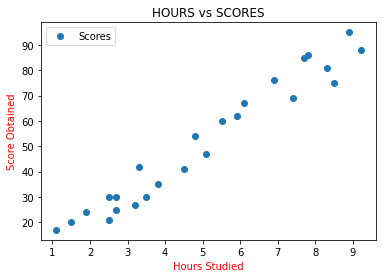

In [202]:
data.plot(x='Hours',y='Scores',style='o',)
plt.title("HOURS vs SCORES")
plt.xlabel("Hours Studied",color='Red')
plt.ylabel("Score Obtained",color='Red')
plt.show()

**CLEANING THE DATA**

In [203]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**AS THERE ARE NO NULL VALUES, DATA CLEANING IS DONE SUCCESSFULLY**

**TRANING AND TESTING THE DATA**

In [204]:
x=(data['Hours'].values).reshape(-1,1)
y=data['Scores'].values

In [205]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [206]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [207]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("Splitting is done successfully")

Splitting is done successfully


In [208]:
len(x_train)

20

In [209]:
len(x_test)

5

In [210]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print("Training is done successfully")

Training is done successfully


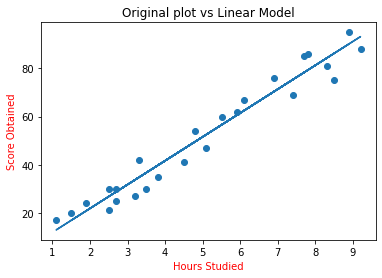

In [211]:
yLine=(reg.coef_)*x + (reg.intercept_)
plt.scatter(x,y)
plt.plot(x,yLine)
plt.xlabel("Hours Studied",color='Red')
plt.ylabel("Score Obtained",color='Red')
plt.title("Original plot vs Linear Model")
plt.show()

In [212]:
yPred=reg.predict(x_test)
df = pd.DataFrame({'Hours': x_test.reshape(1,-1)[0], 'Predicted score': yPred,'Actual score':y_test})  
df

,Hours,Predicted score,Actual score
0,1.5,16.884145,20
1,3.2,33.732261,27
2,7.4,75.357018,69
3,2.5,26.794801,30
4,5.9,60.491033,62


**Now to predict the score for student who studies 9.25 hrs/day**

In [218]:
HoursStudied = 9.25
predictedScore = reg.predict([[HoursStudied]])
print("The predicted score for a student who studies for 9.25 hours a day is ",predictedScore[0])

The predicted score for a student who studies for 9.25 hours a day is  93.69173248737538


**So, the predicted percentage score for student who studies 9.25 hrs/day is 93.69 approximately**

**Evaluating the model**

In [228]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,yPred)

4.183859899002975

**Mean absolute error is 4.18**

In [231]:
reg.score(x_test,y_test)

0.9454906892105356

**The Accuracy of this model is 0.94 (94%)**